# Analyze Transportion Effects of Covid19 (Hypothesis, Time series)



# Team Members: Yuanying Li, Chen Liang, Ketaki Joshi, Chenang Zhang

#### Imports some packages we gonna use

In [ ]:
#Builds 'n Installs
#!pip install scipy==1.2
!pip install -q --upgrade scipy;
!pip install -q --upgrade quandl;
!pip install -q --upgrade pandas-datareader;
!pip install -q --upgrade statsmodels;
!pip install pmdarima==1.6.0
!pip install MonthDelta==1.0a

     |████████████████████████████████| 8.7MB 3.1MB/s 
     |████████████████████████████████| 1.5MB 3.4MB/s 
  Created wheel for MonthDelta: filename=MonthDelta-1.0a0-cp36-none-any.whl size=4618 sha256=78e469968ea98abc36fcd7b56b368fcba4e97a50ef5a64a4fe1ad2785e9045ba
  Stored in directory: /root/.cache/pip/wheels/6f/23/b0/b378f4fdbf2b804e510b228469579223518318f5611a09bff3
Successfully built MonthDelta


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
import plotly.graph_objects as go
import plotly.express as px
import os
plt.style.use('seaborn')
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway,ttest_ind
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
import requests
import warnings
import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
import io
import scipy
import quandl
import pandas_datareader as pdr
from pandas_datareader import data, wb
import fix_yahoo_finance as yf
from matplotlib.pyplot import plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import style
import matplotlib.ticker as mtick
from datetime import date
from datetime import datetime
from dateutil.parser import parse
import math
from monthdelta import MonthDelta
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit
import pmdarima as pm
sns.set_style('whitegrid')
%matplotlib

Using matplotlib backend: agg


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Part 1 - Current Situation of Covid-19

In [ ]:
#Acquire the data
#Links to raw files for Covid-19 dataset provided by CSSEGIS JHU
#Those four datasets contain daily time series summary tables, including confirmed cases, deaths,recovered cases and cases by country of Covid-19,respectively.
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
cases_country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
print(confirmed_df.shape)
print(deaths_df.shape)
print(recovered_df.shape)
print(cases_country_df.shape)

(266, 116)
(266, 116)
(252, 116)
(188, 14)


## Field description


*   Province_State - The name of the State within the USA.
*   Country_Region - The name of the Country (US).
*   Last_Update - The most recent date the file was pushed.
*   Lat - Latitude.
*   Lat - Latitude.
*   Confirmed - Aggregated confirmed case count for the state.
*   Deaths - Aggregated Death case count for the state.
*   Recovered - Aggregated Recovered case count for the state.
*   Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
*   Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.

In [ ]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45


In [ ]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16,21,26,31,39,52,58,71,71,128,128,128,169,169,191,205,235,248,282,309,333,344,344,344,385,398,423,468,468,472,493,499,514,521,526,537,545,550,550,568
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,4,4,4,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,7,7,11,11,11,11,11,11,11,11,13,13,13,13


In [ ]:
cases_country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-05-13 23:32:26,-25.0000,133.0000,6979,98,6271,610,27.411949,NaN,NaN,1.404213,36,AUS
1,Austria,2020-05-13 23:32:26,47.5162,14.5501,15997,624,14304,1069,177.618138,NaN,NaN,3.900731,40,AUT
2,Canada,2020-05-13 23:32:26,60.0010,-95.0010,73563,5425,35177,32961,194.324755,NaN,NaN,7.374631,124,CAN
3,China,2020-05-13 23:32:26,30.5928,114.3055,84021,4637,79242,142,5.981520,NaN,NaN,5.518858,156,CHN
4,Denmark,2020-05-13 23:32:26,56.0000,10.0000,10865,533,8861,1471,187.579752,NaN,NaN,4.905660,208,DNK


### Let’s have a look at the situation so far and where we stand globally today

In [ ]:
#Drop some unneccessary columns in cases_country dataframe.
#Count the sum of confirmed, deaths, recovered and active cases of Covid-19 globally
global_data = cases_country_df.copy().drop(['Lat','Long_','Country_Region','Last_Update','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID'],axis=1)
global_summary = pd.DataFrame(global_data.sum()).transpose()
global_summary.style.format( "{:,.0f}")

,Confirmed,Deaths,Recovered,Active
0,"4,342,565","296,690","1,546,811","2,504,227"


In [ ]:
#Drop some unneccessary columns in confirmed cases dataframe.
#Summary the total confirmed cases globally
confirmed_ts = confirmed_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis=1)
confirmed_ts_summary = confirmed_ts.sum()
confirmed_ts_summary

1/22/20        555
1/23/20        654
1/24/20        941
1/25/20       1434
1/26/20       2118
            ...   
5/8/20     3938064
5/9/20     4024009
5/10/20    4101699
5/11/20    4177502
5/12/20    4261747
Length: 112, dtype: int64

### To figure how this spread has progressed over a period of time, I plotted the confirmed cases using plotly.graph_objects. 

In [ ]:
#Plot Chart 1 : Total Confirmed Covid-19 Cases (Globally)
fig_1 = go.Figure(data = go.Scatter(x = confirmed_ts_summary.index, y = confirmed_ts_summary.values, mode = 'lines+markers'))
fig_1.update_layout(title = 'Total Coronavirus Confirmed cases (globally)',yaxis_title='confirmed cases',xaxis_tickangle = 315)
fig_1.show()

### The sharp exponential curve that can be seen on the right side of the graph shows the devastating rate at which the pandemic is spreading worldwide. Before further drill-down, I looked at the progression of recovered, death and active cases as well. 

In [ ]:
#Defining a template plot function & color arrary
#Initializing Color Array to be used across the analysis
color_arr = px.colors.qualitative.Dark24

In [ ]:
def draw_plot(ts_array, ts_label, title, colors, mode_size, line_size, x_axis_title, y_axis_title, yaxis_type, additional_annotations,tickangle=0):
              #Intialize figure
              fig = go.Figure()
              #Add all traces
              for index, ts in enumerate (ts_array):
                fig.add_trace(go.Scatter(x=ts.index,
                                         y=ts.values,
                                         name=ts_label[index],
                                         line=dict(color=colors[index],width=line_size[index]),connectgaps=True,))
                #Base X_axis prop.
                x_axis_dict = dict(showline = True,
                                   showgrid = True,
                                   showticklabels = True,
                                   linecolor = 'rgb(204, 204, 204)',
                                   linewidth = 2,
                                   ticks='outside',
                                   tickfont=dict(family='Arial', size=12, color='rgb(82, 82, 82)',))
                 #Setting x_axis params
                if x_axis_title:
                  x_axis_dict['title'] = x_axis_title

                if tickangle > 0:
                  x_axis_dict['tickangle'] = tickangle

                 #Base y_axis prop
                y_axis_dict = dict(showline=True,
                                   showgrid=True,
                                   showticklabels=True,
                                   linecolor = 'rgb(204, 204, 204)',
                                   linewidth = 2,)
                
                #Setting y_axis params
                if yaxis_type !=  '':
                  y_axis_dict['type'] = yaxis_type
                
                if y_axis_title:
                  y_axis_dict['title'] = y_axis_title

                #Updating the layout
                fig.update_layout(xaxis = x_axis_dict,
                                  yaxis = y_axis_dict,
                                  autosize = True,
                                  margin = dict(autoexpand = True, l=100, r=20, t=110,),
                                  showlegend = True,)
                
                #Base annotations for any graph
                annotations = []
                annotations.append(dict(xref = 'paper', yref = 'paper', x=0.0, y=1.05,xanchor = 'left', yanchor = 'bottom',
                                       text = title,
                                       font = dict(family = 'Arial', size = 16, color='rgb(37,37,37)'),showarrow = False))
                #Adding annotations in params
                if len(additional_annotations) >0:
                  annotation.append(additional_annotations)
                
                #Updating the layout
                fig.update_layout(annotations = annotations)

              return fig             

In [ ]:
confimed_agg_ts = confirmed_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()
death_agg_ts = deaths_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()
recovered_agg_ts = recovered_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()

#There is no timeseries data for Active cases, therefore it needs to be engineered separately
active_agg_ts = pd.Series(
    data=np.array(
        [x1 - x2 - x3  for (x1, x2, x3) in zip(confimed_agg_ts.values,death_agg_ts.values, recovered_agg_ts.values)]),
    index= confimed_agg_ts.index)

#Plot and add traces for all the aggregated timeseries
ts_array = [confimed_agg_ts, active_agg_ts, recovered_agg_ts, death_agg_ts]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5],  color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

# Calling the draw_plot function defined above
fig_2 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Covid-19 Case Status(22nd Jan to 28th March 2020)",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Case Count", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations=[])

fig_2.show()

In [ ]:
#Show the Current situation of Covid-19 cases in every country.
cases_country_df.copy().drop(['Lat','Long_','Last_Update','People_Tested','People_Hospitalized','UID'],
                             axis=1).sort_values(
                                 'Confirmed',ascending = False).reset_index(drop=True).style.bar(align='left',width=98)                          

## Analysing Coronavirus: The USA Focus

In this section, we will focus on the data points with respect to USA. For this, data needed to be filtered out from each of the data-frame conditionally for USA. This can be done as follows

In [ ]:
#Plot Chart 3: "Covid-19 Case Trend in USA"
confirmed_us_ts = confirmed_df[confirmed_df['Country/Region']=="US"]
confirmed_us_ts = confirmed_us_ts.drop(
    ['Lat', 'Long', 'Country/Region','Province/State'], axis =1).reset_index(drop=True).sum()

deaths_us_ts = deaths_df[deaths_df['Country/Region']=='US']
deaths_us_ts = deaths_us_ts.drop(
    ['Lat', 'Long', 'Country/Region','Province/State'], axis =1).reset_index(drop=True).sum()

recovered_us_ts = recovered_df[recovered_df['Country/Region']=='US']
recovered_us_ts = recovered_us_ts.drop(
    ['Lat', 'Long', 'Country/Region','Province/State'], axis =1).reset_index(drop=True).sum()
    
#There is no timeseries data for Active cases, therefore it needs to be engineered separately
active_us_ts = pd.Series(
    data=np.array(
        [x1 - x2 -x3 for (x1, x2, x3) in zip(
            confirmed_us_ts.values, deaths_us_ts.values, recovered_us_ts.values)
        ]
    ),
    index = confirmed_us_ts.index
)
  

In [ ]:
ts_array = [confirmed_us_ts, active_us_ts, recovered_us_ts, deaths_us_ts]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5], color_arr[0],color_arr[2],color_arr[3]]
mode_size = [8,8,12,8]
line_size = [2,2,4,2]

#Calling the draw_plot function defined above
fig_3 = draw_plot(ts_array=ts_array,
                  ts_label = labels,
                  title = 'COVID19 Cases Trendency in US ',
                  colors = colors, mode_size = mode_size,
                  line_size = line_size,
                  x_axis_title = 'Date',
                  y_axis_title = 'Case count',
                  tickangle=315,
                  yaxis_type='', additional_annotations=[])
fig_3.show() 

## Part 2 - Effect of COVID-19 on road transportation in the USA 

In [ ]:
#Acquiring data set
data = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQphTE0H8fhKwcFAIfR7vE6w6aSqnYQcTj8JfLgT6QtrQ0UgP2ehv5neHaaSbkMxc2mdvmoPzFwx3O3/pub?gid=917688064&single=true&output=csv'
mta_df = pd.read_csv(data)
mta_df.head(3)

,statefp10,countyfp10,state_name,county_name,ref_dt,county_vmt,jan_avg_vmt
0,1,1,Alabama,Autauga,2020-03-01,3890000,3571446
1,1,1,Alabama,Autauga,2020-03-02,3630000,3571446
2,1,1,Alabama,Autauga,2020-03-03,3570000,3571446


#Dataset Information 

**statefp10 :** FIPS code. Each state has its own code.  

For example

1- Alabama  

6 - California

56 - Wyoming

**countyfp10 :** FIPS county code 

Here is the link: https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt

**state_name :** State name

**county_name:** County name in each state 

**ref_dt:** Reference date. This data set includes the date from March 1, 2020 to May 5, 2020. 

**county_vmt:** Vehicle miles traveled in each county 

**jan_avg_vmt:** The average vehicle miles traveled in January. 


In [ ]:
mta_df.shape 

(192911, 7)

In [ ]:
mta_df.county_vmt.describe().round()

count       192911.0
mean       2396748.0
std        7014876.0
min           2440.0
25%         311000.0
50%         757000.0
75%        1990000.0
max      323000000.0
Name: county_vmt, dtype: float64

During the period from March 1, 2020, to May 5, 2020, the average number of miles traveled was 2396748 with a standard deviation of 7014876. The maximum and a minimum number of miles traveled was 323000000 and 2440 respectively.

The standard deviation is so high because we considered almost all the states and counties in the USA. Moreover, all the states and counties do not have a similar population.

Also, shelter in place order has not been issued and implemented all over the USA on the same day. Some states issued and implemented shelter in place earlier, some states later and some states haven't issued a shelter in place order.

These could be the reasons for the high standard deviation and difference between the minimum and the maximum number of miles traveled. We will explore this in further analysis.

In [ ]:
#Checking for the maximum number of miles traveled 
mta_df.county_vmt.max(), mta_df.county_vmt.argmax() 

(323000000, 160472)

In [ ]:
mta_df[160472:160473]

,statefp10,countyfp10,state_name,county_name,ref_dt,county_vmt,jan_avg_vmt
160472,48,201,Texas,Harris,2020-03-07,323000000,208292804


Here we can see, the maximum number of miles traveled was in Texas state and Harris county on March 7, 2020. 

Now let's check for the minimum number of miles traveled in which State and county. 

In [ ]:
#Checking for the minimum number of miles traveled 
mta_df.county_vmt.min(), mta_df.county_vmt.argmin()

(2440, 76653)

In [ ]:
mta_df[76653:76654]

,statefp10,countyfp10,state_name,county_name,ref_dt,county_vmt,jan_avg_vmt
76653,25,19,Massachusetts,Nantucket,2020-04-26,2440,97714


The minimum number of miles was traveled in Massachusetts state and Nantucket county on April 26, 2020. 

---



During our research we found that, on March 19, 2020, California became the first state in the nation to declare a statewide shelter in place. So, we narrowed down our analysis for California state. 

# California State 

In [ ]:
mtaCA_df = mta_df.loc[mta_df['state_name'] == 'California']
mtaCA_df.head(3)

,statefp10,countyfp10,state_name,county_name,ref_dt,county_vmt,jan_avg_vmt
10362,6,1,California,Alameda,2020-03-01,40700000,38339197
10363,6,1,California,Alameda,2020-03-02,35500000,38339197
10364,6,1,California,Alameda,2020-03-03,32900000,38339197


In [ ]:
#Checking shape of the dataset
mtaCA_df.shape 

(3696, 7)

In [ ]:
#Counties in California
mtaCA_df['county_name'].unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [ ]:
mtaCA_df.county_vmt.describe().round()

count         3696.0
mean       8532870.0
std       20362342.0
min          17000.0
25%         650000.0
50%        2135000.0
75%        6742500.0
max      275000000.0
Name: county_vmt, dtype: float64

In [ ]:
#Checking minimum and maximum number of miles traveled in which county
print('The minimum number of miles traveled: ',mtaCA_df.county_vmt.min(), mtaCA_df.county_vmt.argmin())
print('The maximum number of miles traveled:', mtaCA_df.county_vmt.max(), mtaCA_df.county_vmt.argmax())

The minimum number of miles traveled:  17000 3335
The maximum number of miles traveled: 275000000 1127


In [ ]:
#Printing the result for mimimum VMT 
mtaCA_df[3335:3336] 

,statefp10,countyfp10,state_name,county_name,ref_dt,county_vmt,jan_avg_vmt
13697,6,105,California,Trinity,2020-04-05,17000,90035


In [ ]:
#Printing the result for maximum VMT 
mtaCA_df[1127:1128]

,statefp10,countyfp10,state_name,county_name,ref_dt,county_vmt,jan_avg_vmt
11489,6,37,California,Los Angeles,2020-03-06,275000000,237689973


We found that the minimum number of miles traveled was in Trinity county after the shelter in place implemented and the maximum number of miles traveled was in Los Angeles county before the shelter in place implemented.

During the research, we also found that Santa Clara County (including the other five counties) in San Francisco Bay Area became the first in California state to implement the shelter in place starting March 17 to slow the spread of the virus.

We decided to use Santa Clara, Los Angeles, and Trinity counties for further analysis.

The selection of Trinity and Los Angeles counties is based on the minimum and the maximum number of miles traveled respectively. Here, we ignored the reference date.

We used the hypothesis test to check whether the vehicle miles traveled  decreased after the shelter in place order implemented or was it the same for  three counties individually.

We also run a hypothesis test for California State as a whole.

#Hypothesis test for VMT in California State

* California announced a statewide shelter-in-place order on the evening of March 19. The order immediately went into effect.

* **H0:** The average number of vehicle miles traveled(VMT) after shelter in place order was implemented (on March 19) is similar to the miles before the order was implemented.

* **H1:** The average number of vehicle miles traveled after shelter in place order was implemented (on March 19) is less than the miles before the order was implemented.

* p-value = 0.05

In [ ]:
# Dividing the data into before and after shelter in place order  
caBefore_df = mtaCA_df.loc[mtaCA_df['ref_dt'] < '2020-03-19']
caAfter_df = mtaCA_df.loc[mtaCA_df['ref_dt'] >= '2020-03-19'] 

In [ ]:
#Checking the distribution
rcParams['figure.figsize'] = (23, 8)
ca = sns.distplot(mtaCA_df['county_vmt'],bins = 20)
plt.title('Distribution of VMT in California',size = 20)
ca.ticklabel_format(style='plain', axis='x')
ca.ticklabel_format(style='plain', axis='y')
plt.xlabel('Vehicle miles traveled',size=15)

Text(0.5, 0, 'Vehicle miles traveled')

In [ ]:
# Plot a distribution of VMT before and after shelter in place order released
ax = sns.distplot(caBefore_df['county_vmt'], hist=True, bins=15)
bx = sns.distplot(caAfter_df['county_vmt'], hist=True,bins=15)
plt.title('Distribution of VMT before and after March 19(California)',size = 20)
ax.ticklabel_format(style='plain', axis='x')
bx.ticklabel_format(style='plain', axis='y')
plt.xlabel('Vehicle miles traveled',size=15)
plt.legend(['Before shelter in place order','After shelter in place order'])

The VMT in California before and after shelter in place order implemented had a lot of overlap. 

The mode of VMT after the order implemented stands out.

Two groups are independent and normally distributed.

In [ ]:
# Compare samples by using F-test
stat, p = f_oneway(caBefore_df['county_vmt'], caAfter_df['county_vmt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Compare p-value with significance level alpha
alpha = 0.05 
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=247.791, p=0.000
Different distributions (reject H0)


Since p < alpha, reject the null hypothesis. Shelter in place order was successful in reducing the vehicle miles traveled in California

It tells us that there is a significant difference in the group mean.

In [ ]:
# Compare samples by using T-test
t_test, p =ttest_ind(caBefore_df['county_vmt'], caAfter_df['county_vmt'])
print("The t_test value =", t_test,"p-value=", p)

# Compare p-value with significance level alpha
alpha = 0.05
if p <= alpha: 
  print("The average vehicle miles traveled are decreased (Reject Ho)")
else:
  print('The average vehicle miles traveled are same (Do not reject Ho)')

The t_test value = 15.7413789287316 p-value= 4.344304230335753e-54
The average vehicle miles traveled are decreased (Reject Ho)


Hence, from the above graphs and the test results, we can conclude that after the shelter in place order implemented, the average vehicle miles traveled have been decreased.

---

Now let's check by how many percent the average VMT is decreased.

The sample size is different for before and after the shelter in place. So to make the base the same and to check the percentage decrease in the initial days after the shelter in place implemented, we selected the data from March 19 through April 05 (18 days period ).

In [ ]:
# Choose the data from March 19 through April 05
caA_df = mtaCA_df.loc[(mtaCA_df['ref_dt'] >= '2020-03-19') & (mtaCA_df['ref_dt'] <= '2020-04-05') ]
caA_df.tail(3) 

,statefp10,countyfp10,state_name,county_name,ref_dt,county_vmt,jan_avg_vmt
14025,6,115,California,Yuba,2020-04-03,1120000,2208946
14026,6,115,California,Yuba,2020-04-04,694000,2208946
14027,6,115,California,Yuba,2020-04-05,383000,2208946


In [ ]:
#Checking average VMT before and after shelter in place implemented 
caB = caBefore_df['county_vmt'].mean()
caA = caA_df['county_vmt'].mean()
print('The average VMT before shelter in place implemented:', caB)
print('The average  VMT after shelter in place implemented:',caA) 

#Checking percentage decrease 
per_dec = ((caB-caA)/caB)*100
print("The VMT decreased by:%.2f" % (per_dec)+'%')

The average VMT before shelter in place implemented: 16868708.73015873
The average  VMT after shelter in place implemented: 5269449.603174604
The VMT decreased by:68.76%


In [ ]:
#Let's check for total VMT before and after shelter in place implemented 
catB = caBefore_df['county_vmt'].sum()
catA = caA_df['county_vmt'].sum()
print('Total VMT before shelter in place implemented:', catB)
print('Total VMT after shelter in place implemented:',catA)


Total VMT before shelter in place implemented: 17003658400
Total VMT after shelter in place implemented: 5311605200


In [ ]:
#Total percentage decrease 
per_dect = ((catB-catA)/catB)*100 
per_dect.round() 

69.0

#Hypothesis test for VMT in Trinity County

**H0:** The average number of vehicle miles traveled(VMT) after shelter in place order was implemented (on March 19) is similar to the miles before the order was implemented.

**H1:** The average number of vehicle miles traveled after shelter in place order was implemented (on March 19) is less than the miles before the order was implemented.

p-value = 0.05

In [ ]:
# Choosing Trinity County
trinity_df = mta_df.loc[(mta_df['county_name'] == 'Trinity') & (mta_df['state_name'] == 'California')]
trinity_df.head(3)

,statefp10,countyfp10,state_name,county_name,ref_dt,county_vmt,jan_avg_vmt
13662,6,105,California,Trinity,2020-03-01,102000,90035
13663,6,105,California,Trinity,2020-03-02,94000,90035
13664,6,105,California,Trinity,2020-03-03,116000,90035


In [ ]:
trinity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 13662 to 13727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   statefp10    66 non-null     int64 
 1   countyfp10   66 non-null     int64 
 2   state_name   66 non-null     object
 3   county_name  66 non-null     object
 4   ref_dt       66 non-null     object
 5   county_vmt   66 non-null     int64 
 6   jan_avg_vmt  66 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 4.1+ KB


In [ ]:
# Checking the distribution 
sns.distplot(trinity_df['county_vmt'],bins = 20)
plt.title('Distribution of VMT in Trinity County ',size = 20)
plt.xlabel('Vehicle miles traveled',size=15)

# Convert scientific notation to real number
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

ticklabel reference : https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html

In [ ]:
# Divide the data into before or after March 19
tBefore_df = trinity_df.loc[trinity_df['ref_dt'] < '2020-03-19']
tAfter_df = trinity_df.loc[trinity_df['ref_dt'] >= '2020-03-19'] 

In [ ]:
# Plot a distribution of VMT before and after shelter in place order released
ax0 = sns.distplot(tBefore_df['county_vmt'], hist=True)
bx0 = sns.distplot(tAfter_df['county_vmt'], hist=True)
plt.title('Distribution of VMT before and after March 19(Trinity)',size = 20)
ax0.ticklabel_format(style='plain', axis='x')
bx0.ticklabel_format(style='plain', axis='y')
plt.xlabel('Vehicle miles traveled',size=15)
plt.legend(['Before shelter in place order','After shelter in place order'])

* The VMT in Trinity county before shelter in place order implemented ranged from 50,000 miles to 200,000 miles which is higher than the miles after the order implemented ranged from 20,000 mileds to 120,000 miles.

* Two groups are independent and normally distributed.


In [ ]:
#Compare samples using t-test

t_test, p =ttest_ind(tBefore_df['county_vmt'], tAfter_df['county_vmt'])
print("The t_test value =", t_test,"p-value=", p)

#Interpret results
alpha = 0.05
if p <= alpha: 
  print("The average vehicle miles traveled are decreased (Reject Ho)")
else:
  print('The average vehicle miles traveled are same (Do not reject Ho)')

The t_test value = 6.506581537034709 p-value= 1.3543537455941889e-08
The average vehicle miles traveled are decreased (Reject Ho)


Since the p-value is less than alpha, we rejected the null hypothesis. 

The vehicle miles traveled have reduced after the shelter in place order was implemented.   

In [ ]:
# Choose the data from March 19 through April 05
tA_df = trinity_df.loc[(trinity_df['ref_dt'] >= '2020-03-19') & (trinity_df['ref_dt'] <= '2020-04-05') ]
tA_df

# Calculate the percentage decrease before and after shelter in place
tB = tBefore_df['county_vmt'].mean()
tA = tA_df['county_vmt'].mean() 

print('The average VMT before shelter in place implemented:%.2f'% (tB))
print('The average VMT after shelter in place implemented:%.2f'%(tA))

per_dec1 = ((tB-tA)/tB)*100 
print("The VMT decreased by:%.2f" % (per_dec1)+'%')

The average VMT before shelter in place implemented:99394.44
The average VMT after shelter in place implemented:54544.44
The VMT decreased by:45.12%


#Hypothesis test for VMT in Los Angeles County

**H0:** The average number of vehicle miles traveled(VMT) after shelter in place order was implemented (on March 19) is similar to the miles before the order was implemented.

**H1:** The average number of vehicle miles traveled after shelter in place order was implemented (on March 19) is less than the miles before the order was implemented.

p-value = 0.05

In [ ]:
# Choosing Los Angeles county data
la_df = mta_df.loc[mta_df['county_name'] == 'Los Angeles']
la_df.head(3)

,statefp10,countyfp10,state_name,county_name,ref_dt,county_vmt,jan_avg_vmt
11484,6,37,California,Los Angeles,2020-03-01,258000000,237689973
11485,6,37,California,Los Angeles,2020-03-02,221000000,237689973
11486,6,37,California,Los Angeles,2020-03-03,218000000,237689973


In [ ]:
# Checking distribution 
sns.set_style('whitegrid')
tran = sns.distplot(la_df['county_vmt'],bins = 20)
plt.title('Distribution of VMT in Los Angeles county',size = 20)
tran.ticklabel_format(style='plain', axis='x')
tran.ticklabel_format(style='plain', axis='y')
plt.xlabel('Vehicle miles traveled',size=15)

Text(0.5, 51.0, 'Vehicle miles traveled')

In [ ]:
# Divide the data into before and after March 19
laBefore_df = la_df.loc[la_df['ref_dt'] < '2020-03-19']
laAfter_df = la_df.loc[la_df['ref_dt'] >= '2020-03-19'] 

In [ ]:
# Plot a distribution of VMT before and after shelter in place order released
ax = sns.distplot(laBefore_df['county_vmt'], hist=True)
bx = sns.distplot(laAfter_df['county_vmt'], hist=True)
plt.title('Distribution of VMT before and after March 19(Los Angeles)',size = 20)
plt.xlabel('Vehicle miles traveled',size=15)
plt.legend(['Before shelter in place order','After shelter in place order'])
ax.ticklabel_format(style='plain', axis='x')
bx.ticklabel_format(style='plain', axis='y')

The VMT in Los Angeles county before shelter in place order implemented ranged from 110,000,000 miles to 255,000,000 miles which is higher than the miles after the order implemented.

The marjority of miles that people drove everyday in LA county after the order implemented was between 50,000,000 miles to 80,000,000 miles.

Two groups are independent and normally distributed.

In [ ]:
# Compare samples by using F-test
stat, p = f_oneway(laBefore_df['county_vmt'], laAfter_df['county_vmt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret results
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=347.915, p=0.000
Different distributions (reject H0)


Since p < alpha, reject the null hypothesis. Shelter in place order was successful in reducing the vehicle miles travled in Los Angeles county.

F-statistic = 347.915 tells us that there is a significant difference in the group mean.

In [ ]:
# Choose the data from March 19 through April 05 
laA_df = la_df.loc[(la_df['ref_dt'] >= '2020-03-19') & (la_df['ref_dt'] <= '2020-04-05')]

#Checking percentage of decreased VMT for Los Angeles county
laB = laBefore_df['county_vmt'].mean()
laA = laA_df['county_vmt'].mean()

per_dec3 = ((laB-laA)/laB)*100
print('The VMT decreased by:%.2f'% (per_dec3)+'%')

The VMT decreased by:70.33%


#Hypothesis test for VMT in Santa Clara County

**H0:** The average amount of vehicle miles traveled(VMT), after shelter in place order was implemented (on March 17) is similar to the miles before the order was implemented.

**H1:** The average amount of vehicle miles traveled, after shelter in place order was implemented (on March 17) is less than the miles before the order was implemented.

p-value = 0.05



In [ ]:
# Choose santa clara county related data
santaclara_df = mta_df.loc[mta_df['county_name'] == 'Santa Clara']
santaclara_df.head(3)

,statefp10,countyfp10,state_name,county_name,ref_dt,county_vmt,jan_avg_vmt
13068,6,85,California,Santa Clara,2020-03-01,50200000,46684046
13069,6,85,California,Santa Clara,2020-03-02,41800000,46684046
13070,6,85,California,Santa Clara,2020-03-03,39700000,46684046


In [ ]:
santaclara_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 13068 to 13133
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   statefp10    66 non-null     int64 
 1   countyfp10   66 non-null     int64 
 2   state_name   66 non-null     object
 3   county_name  66 non-null     object
 4   ref_dt       66 non-null     object
 5   county_vmt   66 non-null     int64 
 6   jan_avg_vmt  66 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 4.1+ KB


In [ ]:
# Plot a distribution of VMT in Santa Clara county
sns.set_style('whitegrid')
tran = sns.distplot(santaclara_df['county_vmt'],bins = 20)
plt.title('Distribution of VMT in Santa Clara county',size = 20)
tran.ticklabel_format(style='plain', axis='x')
tran.ticklabel_format(style='plain', axis='y')
plt.xlabel('Vehicle miles traveled',size=15)

Text(0.5, 51.0, 'Vehicle miles traveled')

In [ ]:
# Divide the data into before and after March 17
scBefore_df = santaclara_df.loc[santaclara_df['ref_dt'] < '2020-03-17']
scAfter_df = santaclara_df.loc[santaclara_df['ref_dt'] >= '2020-03-17'] 

In [ ]:
# Plot a distribution of VMT before and after shelter in place order released
ax = sns.distplot(scBefore_df['county_vmt'], hist=True)
bx = sns.distplot(scAfter_df['county_vmt'], hist=True)
plt.title('Distribution of VMT before and after March 17(Santa Clara)',size = 20)
ax.ticklabel_format(style='plain', axis='x')
bx.ticklabel_format(style='plain', axis='y')
plt.xlabel('Vehicle miles traveled',size=15)
plt.legend(['Before shelter in place order','After shelter in place order'])

The VMT in Santa Clara county before shelter in place order implemented ranged from 20,000,000 miles to 50,000,000 miles which is higher than the miles after the order implemented.

The majority of miles that people drove everyday in Santa Clara county after order implemented was less than 10,000,000 miles.

Two groups are independent and normally distributed.

In [ ]:
# Compare samples by using F-test
stat, p = f_oneway(scBefore_df['county_vmt'], scAfter_df['county_vmt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret results
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=547.216, p=0.000
Different distributions (reject H0)


Since p < alpha, reject the null hypothesis. Shelter in place order was successful in reducing the vehicle miles traveled in Santa Clara county.

F-statistic = 547.216 tells us that there is a significant difference in the group mean.

In [ ]:
# Choose the data from March 17 through April 01
#In Santa Clara county, shelter in place has been implemented from March 17. Therefore we selected data from March 17 through April 01. 
scA_df = santaclara_df.loc[(santaclara_df['ref_dt'] >= '2020-03-17') & (santaclara_df['ref_dt'] < '2020-04-01') ]

#Checking percentage decrease in Santa Clara County
scB = scBefore_df['county_vmt'].mean()
scA  = scA_df['county_vmt'].mean()

per_dec2 = ((scB-scA)/scB)*100
print('The VMT decreased by:%.2f'% (per_dec2)+'%')

The VMT decreased by:79.38%


In [ ]:
#Printing VMT decrease percentage for California State,and three Counties together 
# In the span of first 16-18 days after shelter in place implemented 

print("The percentage VMT decreased in California State:%.2f" % (per_dec)+'%')

print('The percentage VMT decreased in Trinity County:%.2f' % (per_dec1)+'%')

print('The percentage VMT decreased in Los Angeles County:%.2f' % (per_dec3)+'%')

print ('The percentage VMT decreased in Santa Clara County:%.2f' % (per_dec2)+'%')

The percentage VMT decreased in California State:68.76%
The percentage VMT decreased in Trinity County:45.12%
The percentage VMT decreased in Los Angeles County:70.33%
The percentage VMT decreased in Santa Clara County:79.38%


We observed that in an initial 18 days period after the shelter in place implemented, there was a decrease of 68.76% in the average VMT in California State.

We did observe a significant percent decrease in the average VMT for the other three counties as well. 

#Comparing Santa Clara county and Los Angeles county

In [ ]:
# Compare with Santa Clara & Los Angeles county daily VMT reduction
rcParams['figure.figsize'] = (15,8)
sc = sns.lineplot(santaclara_df['ref_dt'], santaclara_df['county_vmt'],markers=False)
sc = sns.lineplot(santaclara_df['ref_dt'],santaclara_df['jan_avg_vmt'],markers=False)
la = sns.lineplot(la_df['ref_dt'],la_df['jan_avg_vmt'],markers=False)
la2 = sns.lineplot(la_df['ref_dt'], la_df['county_vmt'],markers=False)

plt.xlabel('Date',size=15)
plt.ylabel('Vehicle miles traveled', size=15)
plt.title('Compare with three counties\' daily VMT reduction', size=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['VMT in Santa Clara county from March to May','Average VMT in Santa Clara county in January',
           'Average VMT in Los Angeles county in January','VMT in Los Angeles county from March to May'])
sc.grid(False)

# Convert scientific notation to real number
sc.ticklabel_format(style='plain', axis='y')

# Reduce number of plot ticks
every_nth = 7
for n, label in enumerate(sc.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
    else:
      sc.axvline(n,color='grey',linewidth=0.2)

The number of vehicle miles traveled in Los Angeles county is obviously larger than Santa Clara county, but they both had a significant decrease in March.

Although California implemented the shelter in place order starting in mid-March, vehicle miles traveled has been declining since early March.

The reason is, as the number of COVID-19 confirmed cases increased, many companies in California required employees to work from home, and some school districts announced school closures in early March.

We can see the obvious waves in the plot of Los Angeles' VMT. The lowest point of the plot is usually on Sunday. This also means that some residents still drove for essential businesses on weekdays and followed the orders on weekends.

We're also seeing a rise in VMT as the shelter in place order continues, perhaps because people can't stand staying indoors anymore.

We didn't draw Trinity county on the plot because the VMT in Trinity county is so small that it tends to be a straight line when compared to other counties. We couldn't get valuable information.

## Part 3 - Effect of COVID-19 on fatal car accidents

In [ ]:
#Builds 'n Installs
#!pip install scipy==1.2
!pip install -q --upgrade scipy;
!pip install -q --upgrade quandl;
!pip install -q --upgrade pandas-datareader;
!pip install -q --upgrade statsmodels;
!pip install pmdarima==1.6.0
!pip install MonthDelta==1.0a


In [ ]:
from statsmodels.tsa.stattools import adfuller
import requests
import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
import io
import scipy
import quandl
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import style
import matplotlib.ticker as mtick
import datetime
from datetime import date
from datetime import datetime
from dateutil.parser import parse
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from monthdelta import MonthDelta
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit
import pmdarima as pm


The aim of this study is to use a time-series regression to predict the fatal car accident after April 2020.

 We believe there is a proportional relationship between vmt and fatal car accident. That is, the more you drive, the more likely you might die from car accident. So, keeping other things the same,  we use the prediction of fatal car accident without cov19 to multiply with the decreased percentage of vehicle miles of travel to calculate how might COVIDv-19 save people from the fatal car accident in California.

We will:

1.Clean the data 

2.Build the model

3.Build the model with cross-validation

4.Predict:a) Fatal car accident in each month without cov-19 b) Fatal car accident in each month  with cov-19 c) Cumulated people who are saved because of staying at home

#1. Clean the data

The data set is from https://www-fars.nhtsa.dot.gov/Crashes/CrashesTime.aspx 

We merged several dataset of California into one and thus the dataset is from 1999 Jan to 2018 Dec.

In [ ]:
# Load Dataset
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vQ53cPacxI8ctAPk6A9ihg38WkStMDD_N2xIRZFNyPvHc4E428qdsKHV_JrXpV16f-ISHEaOu0Zi-Yu/pub?gid=0&single=true&output=csv"
df = pd.read_csv(data_path)

In [ ]:
df.head()

,Period,FatalCount
0,January,255
1,February,180
2,March,239
3,April,243
4,May,248


As you can see the index are not date-time, so we need to convert it to time series. We also made FatalCount float to make manipulation more convenient

In [ ]:
df['FatalCount']=df['FatalCount'].astype(float)

In [ ]:
df.plot(figsize=(16,12))

As you can see, there is defintely seasonal and cyclic pattern according to the definition of https://robjhyndman.com/hyndsight/cyclicts/.


In [ ]:
#Change the index to time series
i=0
for a in range(0,21):
  for b in range(0,12):
    if (b+1)<10:
      df['Period'][i]=str(0)+str(b+1)+'/'+str(1999+a)
    else:
      df['Period'][i]=str(b+1)+'/'+str(1999+a)
    i= i+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ts = df.set_index('Period')
ts.index = pd.to_datetime(ts.index)

In [ ]:
ts.index

DatetimeIndex(['1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
               '1999-09-01', '1999-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Period', length=240, freq=None)

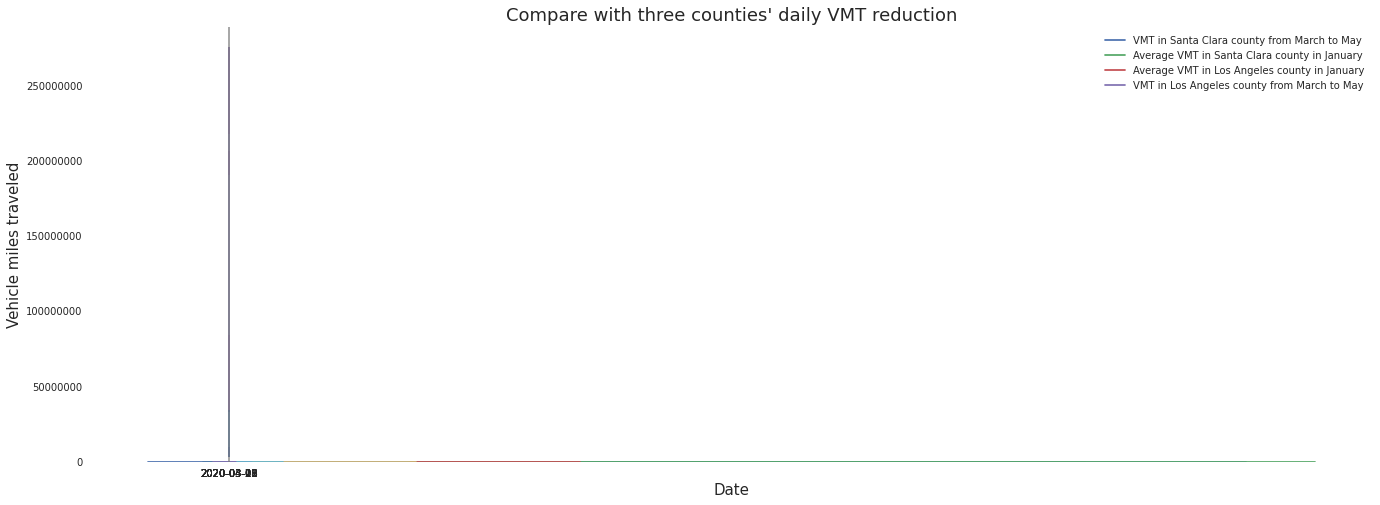

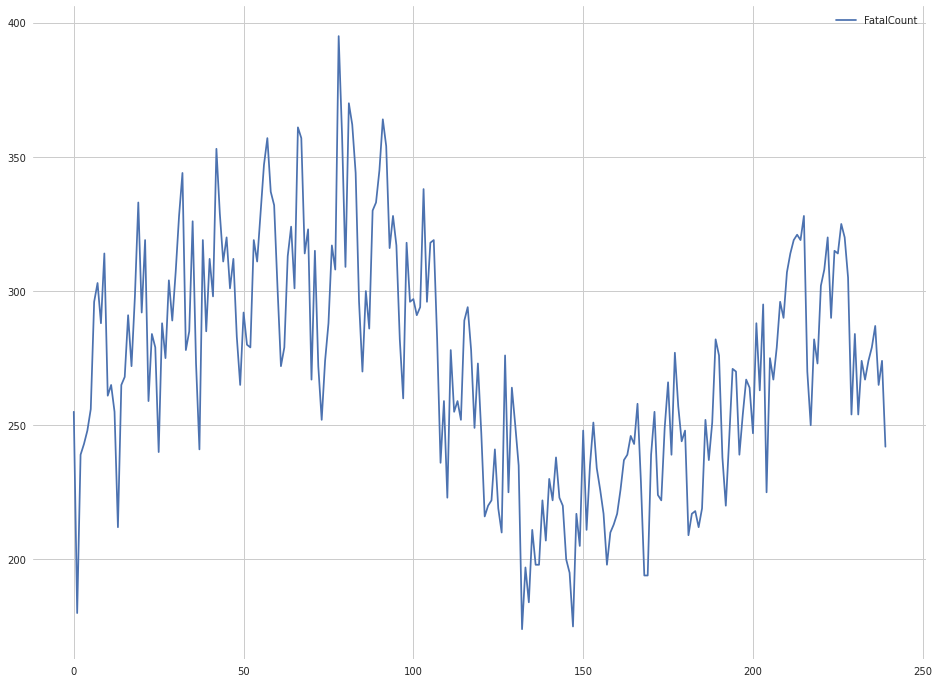

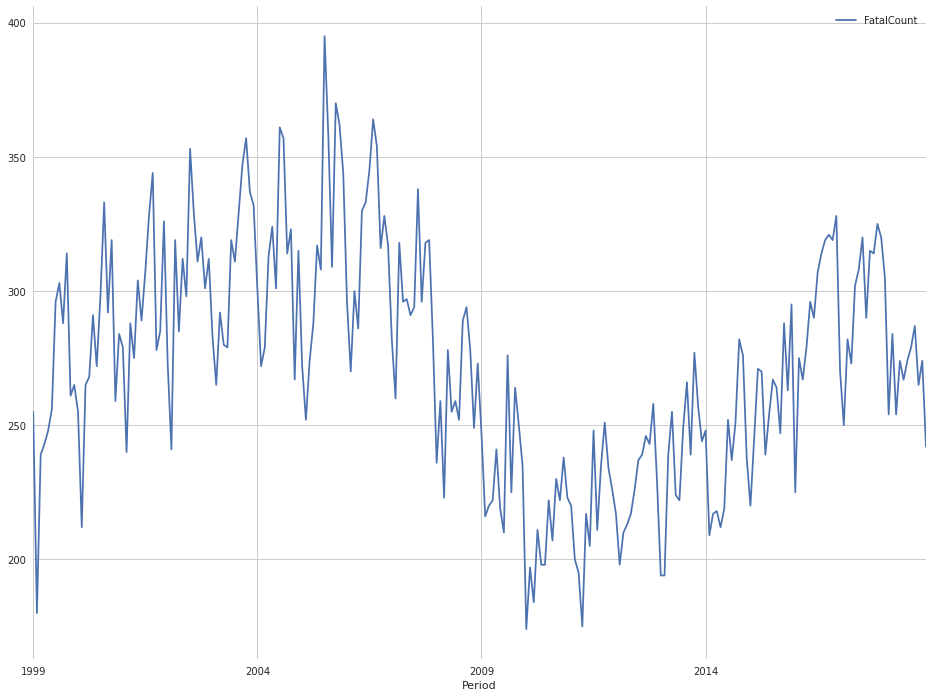

In [ ]:

plt.rcParams["figure.figsize"] = (16,12)
ts.plot()

Note, 1999-01-01 represents the whole January in 1999.

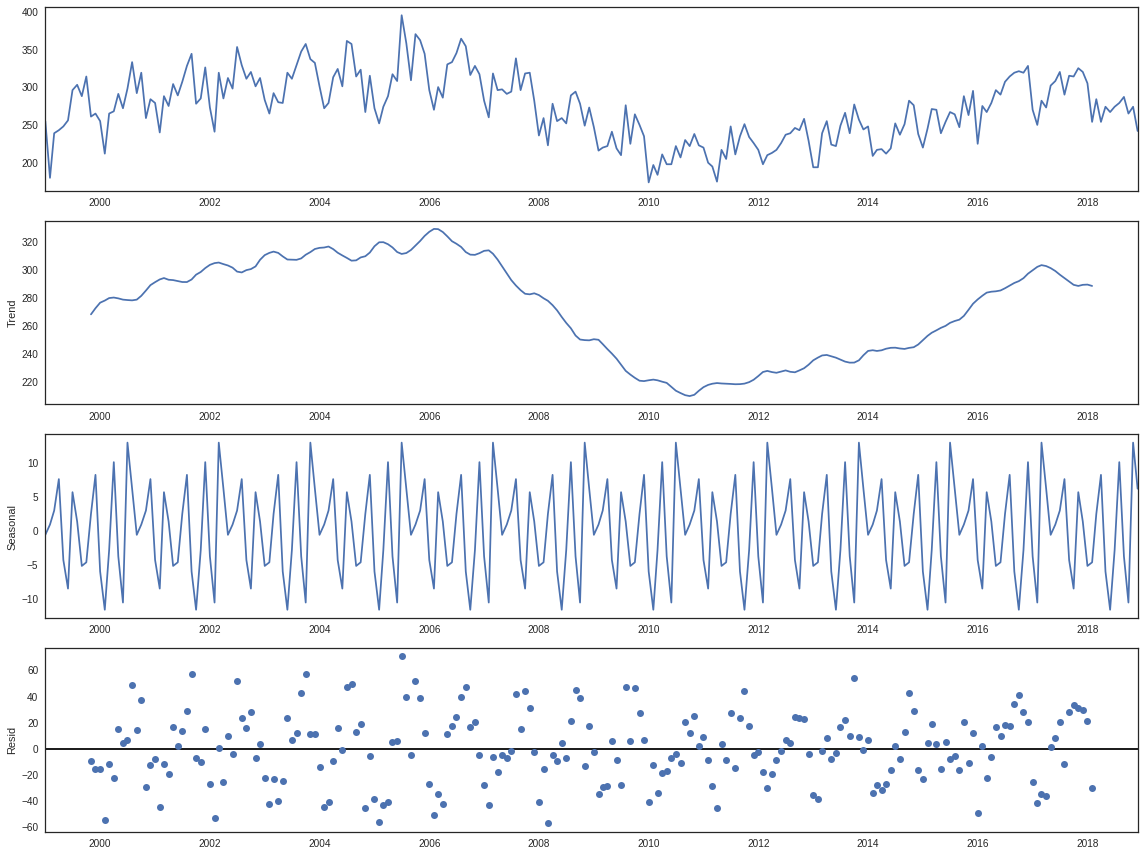

In [ ]:
#Decompose 
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams["figure.figsize"] = (16,12)
plt.style.use('seaborn-white')
res = sm.tsa.seasonal_decompose(ts, model='additive',period=20)
resplot = res.plot()

It is a good decomposition. As you can see there is clear seaonsality, randomized residuals and a clear trend of cycle

#2. Build the model

In [ ]:
#To check whether the data is stationary
print(" > Is the data stationary ?")
dftest = adfuller(ts.FatalCount, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data {} stationary with {}% confidence".format(k, v, "is not" if v<dftest[0] else "is", 100-int(k[:-1])))

 > Is the data stationary ?
Test statistic = -1.484
P-value = 0.541
Critical values :
	1%: -3.459884913337196 - The data is not stationary with 99% confidence
	5%: -2.8745310704320794 - The data is not stationary with 95% confidence
	10%: -2.573693840082908 - The data is not stationary with 90% confidence


The data is not stationary, so we need to consider d in our arima model

In [ ]:
#Try to use a cool Api to fit the model.
#We set stationary  as False, we use adf test. We set the number of period in each season as 12, and we use ocsb for seasonal unit root test.
m1=pm.auto_arima(ts,start_p=0,start_q=0,max_p=3,max_q=3,m=12,start_P=0,start_Q=0,max_P=3,max_Q=3,stationary=False,test='adf',seasonal_test='ocsb',
                 error_action='ignore',information_criterion='aic',suppress_warnings=True,stepwise=True)





This api seems running fast with an algorithm called stepwise. I can increase the range for p,d and q.
http://alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html

In [ ]:
m1.aic()

2155.0374889953537

In [ ]:
a=24
p=m1.predict(n_periods=a)

In [ ]:
p

array([236.71943872, 226.55920587, 243.43884815, 239.86271358,
       247.23773702, 247.20382805, 261.8382909 , 260.11821855,
       262.76925601, 268.43659931, 266.233739  , 258.05216061,
       234.39192875, 224.4712729 , 240.96050089, 237.47054304,
       244.67659652, 244.64633536, 258.94269347, 257.26555418,
       259.85768396, 265.39584386, 263.2471649 , 255.25906363])

Those are the values predicted. But as you can see, it is only an array without time-serie index. So to graph it, we need to convert it to series and set the index

In [ ]:
#This function has 2 parameters. The first one is the model, the second one is the steps of the model.
#We set a variable to the last date of the data set which is 2018-12-01. 
#We created a list to store the index.
#We loop from 0 to the lenth of the step.
#We add one month for the first time, to make the first element of the index list as 2019-01-01.
#The process continued and we make every prediction has its correct time serie index.
def changein(pre,a):
  x=pd.to_datetime('12/2018')
  list1=[]
  for q in range(0,a):    
    x+=MonthDelta(1)
    list1.append(x)
  se=pd.Series(pre)
  se.index=list1

  return se

In [ ]:
t1=changein(m1.predict(n_periods=a),a)

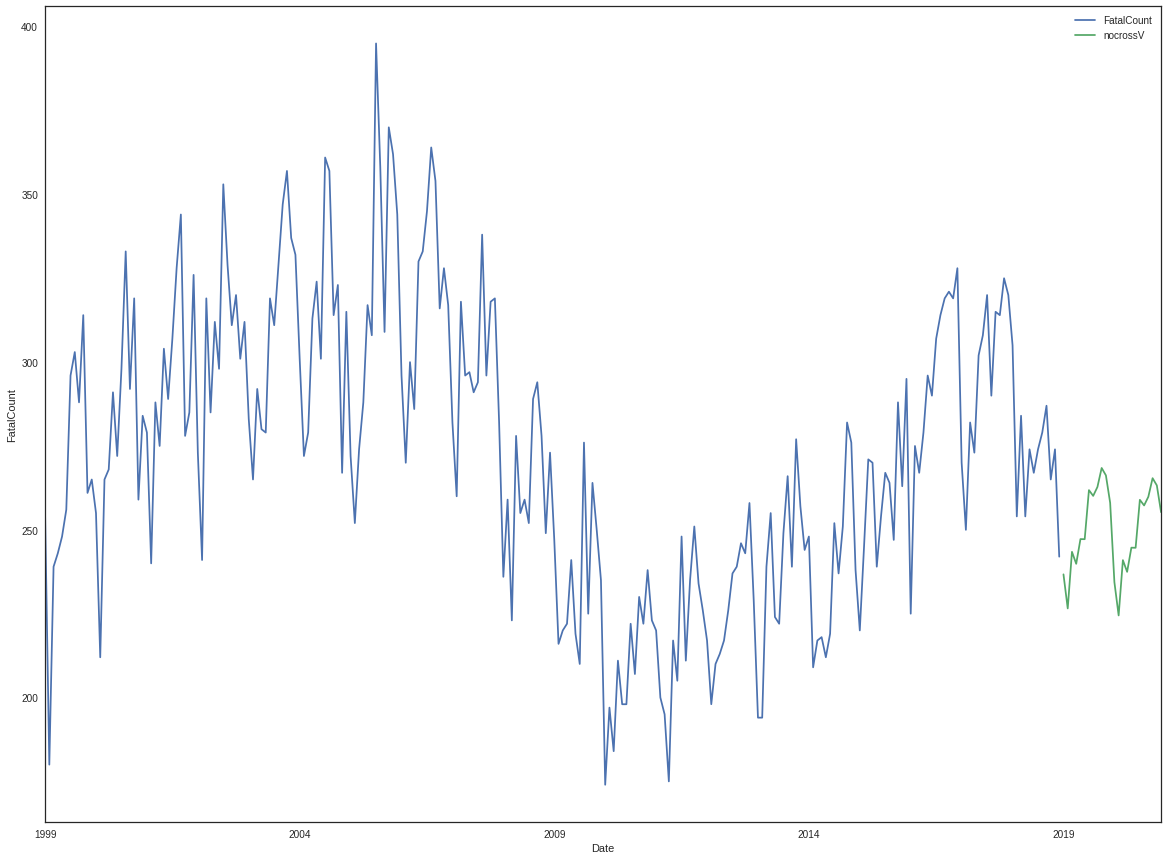

In [ ]:
ax=ts.plot(label='observed', figsize=(20, 15))
t1.plot(ax=ax,label='nocrossV')
ax.set_xlabel('Date')
ax.set_ylabel('FatalCount')
plt.legend()


After ploting the graph, we feel that this graph is very weird. It for sure captures seaonality but we think the trend is not convincing. We feel like the predicted value should have a decrease trend. 
We are aware of that the model does not really do the test-train split. And thus the aic was based on the entire train set.
So we decide to implement a special train test split for time series called TimeSeriesSplit. It is more like a cross-validation.

#Build the model with cross-validation

In [ ]:

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


We cannot just do normal test-train split. Because time serie data are not independent data. To mess up with order is very bad.

In [ ]:
#We set initialization='approximate_diffuse' because if don't, there can be an error says LU DECOPOSITION ERROR.
#https://stackoverflow.com/questions/54136280/sarimax-python-np-linalg-linalg-linalgerror-lu-decomposition-error SUGGESTS it is a bug and I change to a new initialization, and the bug fixed.

#We first split the data into 5 kinds.
#We loop through each combination of hyperparameters and in each loop, we train the model using each of the 5 kinds of splitting.
#Remember we use the train group to train and we use the test group to test. We get the aic for the test group and we find the average of aic for each combination of hyperparameters.

#The calculation of aic is complicated. After fitting the model, we need to find the 5 array of coefficients and to count non-zero ones. And this is the k for the aic.

y = ts['FatalCount']
n=5
tss = TimeSeriesSplit(n_splits = n)
warnings.filterwarnings("ignore") # specify to ignore warning messages
model_output = pd.DataFrame(columns = ['parameters', 'averageaicForagroupofParameter'])
a = "bob"
b = "bob"
c = 1.0
for param in pdq:
  for param_seasonal in seasonal_pdq:
    averageaicForagroupofParameter=0
    for train_index, test_index in tss.split(y):
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
          
      mod = sm.tsa.statespace.SARIMAX(y.iloc[train_index],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                      enforce_stationarity=True,
                                      initialization='approximate_diffuse'
                                            
                                            )
      results = mod.fit()
              
      pred_uc = results.get_forecast(steps=len(y.iloc[test_index]))
      pree=pred_uc.predicted_mean
      count=0
      for z in range(0,len(results.polynomial_ar)):
          if results.polynomial_ar[z]!=0:
            count+=1
      for p in range(0,len(results.polynomial_ma)):
          if results.polynomial_ma[p]!=0:
            count+=1
      for q in range(0,len(results.polynomial_seasonal_ar)):
          if results.polynomial_seasonal_ar[q]!=0:
            count+=1
      for h in range(0,len(results.polynomial_seasonal_ma)):
          if results.polynomial_seasonal_ma[h]!=0:
            count+=1
      for j in range(0,len(results.polynomial_trend)):
          if results.polynomial_trend[j]!=0:
            count+=1
            
      rss = sum((pree.values-y.iloc[test_index].values)**2)
      aiceach= len(y.iloc[test_index])*np.log(rss/len(y.iloc[test_index])) + 2*(count)
      averageaicForagroupofParameter+=aiceach
      
    a = param
    b = param_seasonal
    c = averageaicForagroupofParameter/n
    model_output = model_output.append({'parameters': 'ARIMA{}x{}12'.format(a, b),
                                                'averageaicForagroupofParameter': c}, ignore_index = True)
          




In [ ]:
model_output.sort_values(by = 'averageaicForagroupofParameter')

,parameters,averageaicForagroupofParameter
28,"ARIMA(0, 1, 1)x(1, 0, 0, 12)12",279.32
44,"ARIMA(1, 0, 1)x(1, 0, 0, 12)12",281.08
60,"ARIMA(1, 1, 1)x(1, 0, 0, 12)12",282.11
46,"ARIMA(1, 0, 1)x(1, 1, 0, 12)12",289.45
42,"ARIMA(1, 0, 1)x(0, 1, 0, 12)12",291.78
...,...,...
37,"ARIMA(1, 0, 0)x(1, 0, 1, 12)12",344.84
1,"ARIMA(0, 0, 0)x(0, 0, 1, 12)12",448.72
9,"ARIMA(0, 0, 1)x(0, 0, 1, 12)12",449.94
0,"ARIMA(0, 0, 0)x(0, 0, 0, 12)12",456.03


In [ ]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                 enforce_stationarity=True,
                                            
                               )

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6969      0.051    -13.716      0.000      -0.797      -0.597
ar.S.L12       0.5159      0.052      9.827      0.000       0.413       0.619
sigma2       546.5894     53.481     10.220      0.000     441.769     651.410


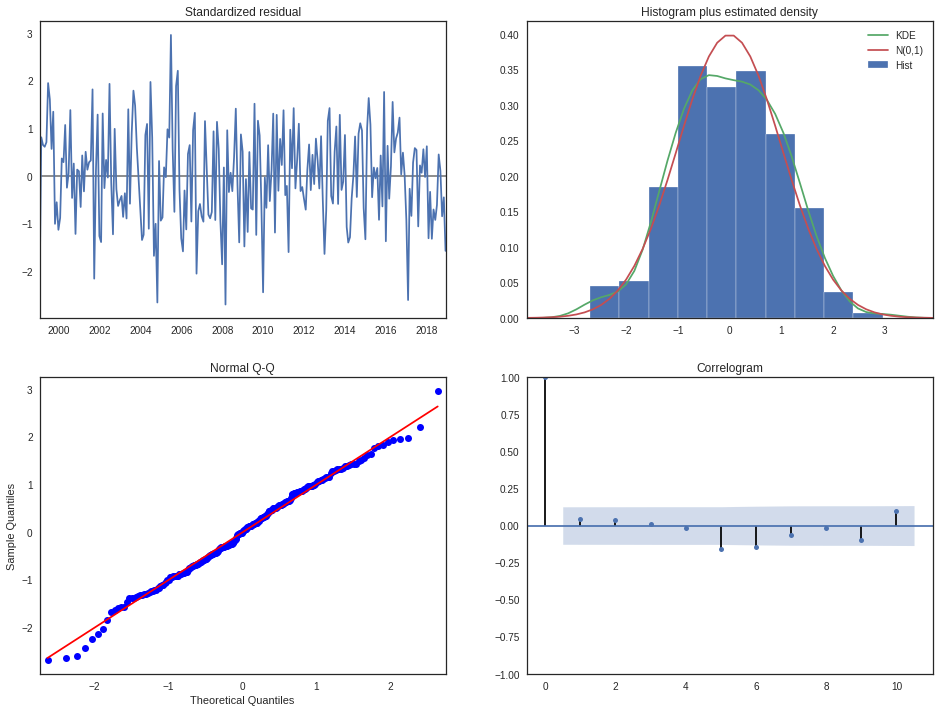

In [ ]:
results.plot_diagnostics()
plt.show()

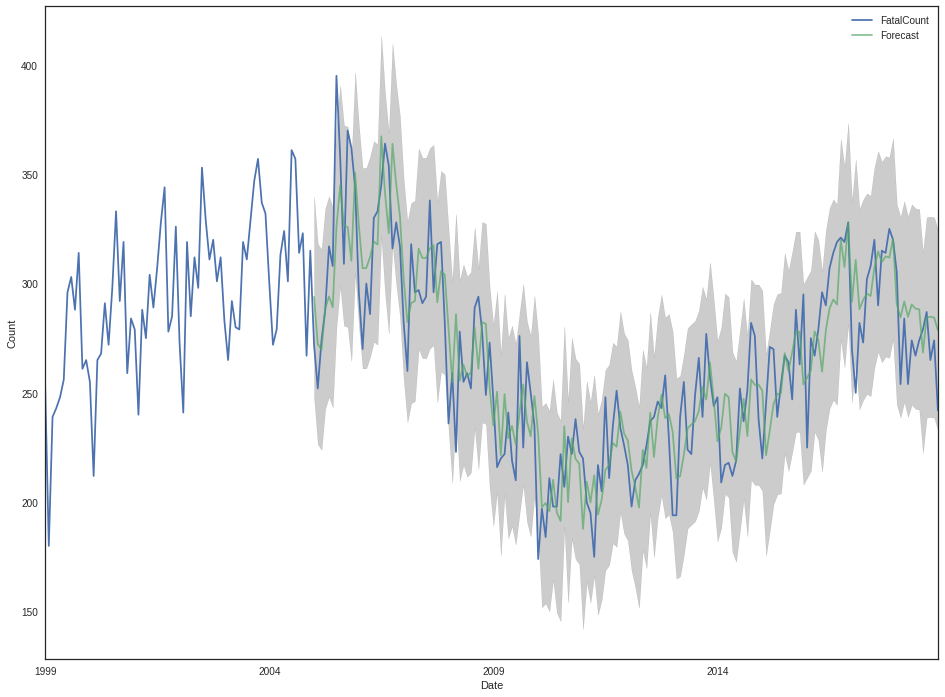

In [ ]:
#Preparing for Forecast 
ax = ts['1999':].plot(label='observed')
pred = results.get_prediction(start=pd.to_datetime('2005-01-01'), dynamic=False)
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)
pred_ci = pred.conf_int()
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend()


As you can see, the model fit the data well. And with cross validation, the risk of overfitting decreased.

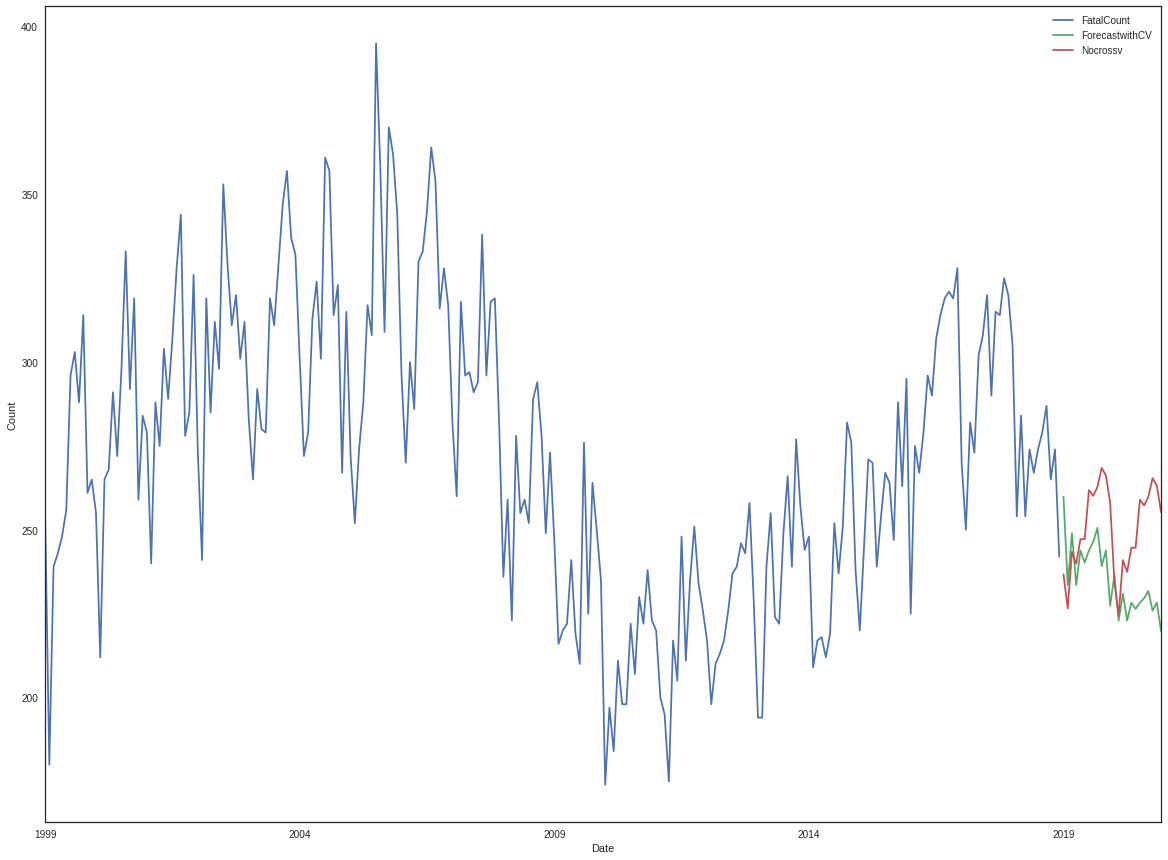

In [ ]:
#Compare the two model
pred_uc = results.get_forecast(steps=24)
ax = ts.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='ForecastwithCV')
t1.plot(ax=ax,label='Nocrossv')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend()

As you can see, the orange, which is the new model, is much better to behave a decrease trend.

#4.Predictions

In [ ]:
#The fatal car accident prediction without COV 19
pred_uc.predicted_mean

2019-01-01   259.84
2019-02-01   233.53
2019-03-01   249.00
2019-04-01   233.53
2019-05-01   243.85
2019-06-01   240.23
2019-07-01   243.85
2019-08-01   246.42
2019-09-01   250.55
2019-10-01   239.20
2019-11-01   243.85
2019-12-01   227.34
2020-01-01   236.54
2020-02-01   222.97
2020-03-01   230.95
2020-04-01   222.97
2020-05-01   228.29
2020-06-01   226.43
2020-07-01   228.29
2020-08-01   229.62
2020-09-01   231.75
2020-10-01   225.89
2020-11-01   228.29
2020-12-01   219.77
Freq: MS, dtype: float64

In [ ]:
#This function is the final function. 

#pred_uc is the result upto the last month we want to know after 2018-12-01
#The for loop is from April to the month we want to know.
##If numberofmonth is 1, it means people to calculate saved in April, 2 means people saved from April to May

#We use the prediction of people who die from car accident from April times the percentage drop of vmt to get the number of how many people might be saved in California.

def predictPeoplesaved(numberofmonth):
  sum1=0
  
  pred_uc = results.get_forecast(steps=15+numberofmonth)
  
  for b in range(15,15+numberofmonth):

    
    
    sum1+=pred_uc.predicted_mean[b]*0.6876
    
    
    print(pred_uc.predicted_mean.index[b],'',sum1.round())



In [ ]:
#The fatal car accident prediction with COV 19 in California
pred_uc.predicted_mean[15:24]*(1-0.6876)

2020-04-01   69.65
2020-05-01   71.32
2020-06-01   70.74
2020-07-01   71.32
2020-08-01   71.73
2020-09-01   72.40
2020-10-01   70.57
2020-11-01   71.32
2020-12-01   68.66
Freq: MS, dtype: float64

In [ ]:
#The cumulative amount of people saved from fatal car accident in California
predictPeoplesaved(11)

2020-04-01 00:00:00  153.0
2020-05-01 00:00:00  310.0
2020-06-01 00:00:00  466.0
2020-07-01 00:00:00  623.0
2020-08-01 00:00:00  781.0
2020-09-01 00:00:00  940.0
2020-10-01 00:00:00  1096.0
2020-11-01 00:00:00  1252.0
2020-12-01 00:00:00  1404.0
2021-01-01 00:00:00  1558.0
2021-02-01 00:00:00  1708.0
